In [4]:
if (!require('forecast')) {
  install.packages('forecast')
  library('forecast')
} else {
  library('forecast')
}

if (!require('devtools', character.only = TRUE)) {
  # Si no está instalada, instalarla
  install.packages('devtools')
  # Cargar la librería
  library('devtools', character.only = TRUE)
} else {
  # Si ya está instalada, cargar la librería
  library('devtools', character.only = TRUE)
}

if (!require('transformeR', character.only = TRUE)) {
  install_github('SantanderMetGroup/transformeR')
  library('transformeR', character.only = TRUE)
} else {
  library('transformeR', character.only = TRUE)
}


Loading required package: devtools

Loading required package: usethis

Loading required package: transformeR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘transformeR’”



dotCall64 (NA -> 1.0-2    ) [CRAN]
maps      (NA -> 3.4.1    ) [CRAN]
spam      (NA -> 2.9-1    ) [CRAN]
sp        (NA -> 2.0-0    ) [CRAN]
kohonen   (NA -> 3.0.12   ) [CRAN]
RcppEigen (NA -> 0.3.3.9.3) [CRAN]
fields    (NA -> 15.2     ) [CRAN]
akima     (NA -> 0.6-3.4  ) [CRAN]
abind     (NA -> 1.4-5    ) [CRAN]


Installing 9 packages: dotCall64, maps, spam, sp, kohonen, RcppEigen, fields, akima, abind

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpYAk1jQ/remotes6da7c5413a2/SantanderMetGroup-transformeR-9fc5590/DESCRIPTION’ ... OK
* preparing ‘transformeR’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘transformeR_2.2.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.1 (2023-06-22) is loaded


Development version may have an unexpected behaviour

Please see 'citation("transformeR")' to cite this package.



In [5]:
load('ba_grid_5.Rdata',verbose = TRUE)
load('df.series_grid_5.Rdata',verbose = TRUE)

Loading objects:
  ba.mergeGrid5
Loading objects:
  df.seriesTemporales_conCoords


Elijo los que píxeles que son más poblados (no tienen ni un solo cero) para que haya más datos y los pongo en un data frame

In [24]:
df_sinCeros <- data.frame()
for (i in 1:nrow(df.seriesTemporales_conCoords)){
    if (all(unlist(df.seriesTemporales_conCoords[i,3:14]) != 0)){
        df_sinCeros <- rbind(df_sinCeros, df.seriesTemporales_conCoords[i,])
    }
}
df_sinCeros[1:5,]

,coord_x,coord_y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-157.5_17.5,-157.5,17.5,8.537555,167.94650,102.23748,0.9757182,70.78624,61.07549,330.5478,1047.7494,104.8866,112.5342,19.34492,63.88650
-157.5_22.5,-157.5,22.5,26.344468,62.69385,115.79825,125.6240955,71.29733,282.15175,590.1779,619.0135,560.5821,217.3675,84.84128,59.01965
-122.5_37.5,-122.5,37.5,618.755855,84.25837,69.27618,1708.4877364,2745.30994,7410.61160,17981.7212,43957.0369,32520.1744,26812.8418,20958.38060,2080.40000
-122.5_42.5,-122.5,42.5,531.036173,458.50596,730.13060,1335.3700182,1616.43042,3304.28220,30074.5662,80886.9974,67942.6008,16887.2475,5730.85188,901.86831
-122.5_47.5,-122.5,47.5,84.643805,10.00114,17.80690,160.9939682,547.53017,2987.60453,20544.7520,24790.5938,18111.7381,7964.0189,4827.75458,250.94613


ELijo un pixel cualquiera y lo represento tanto con estadísticas normales como con estadísticas circulares

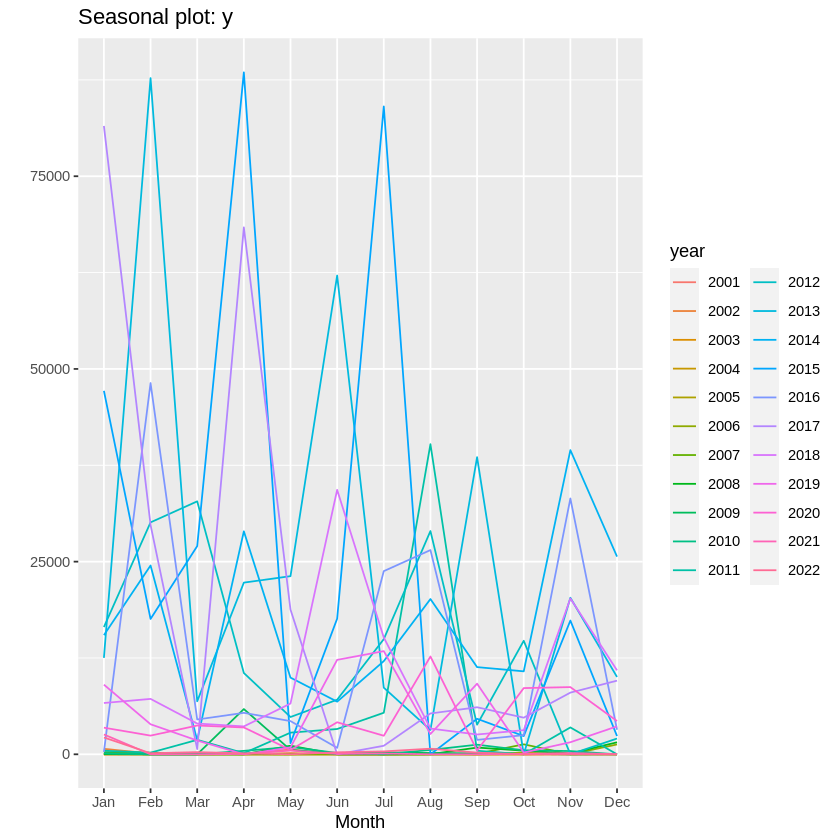

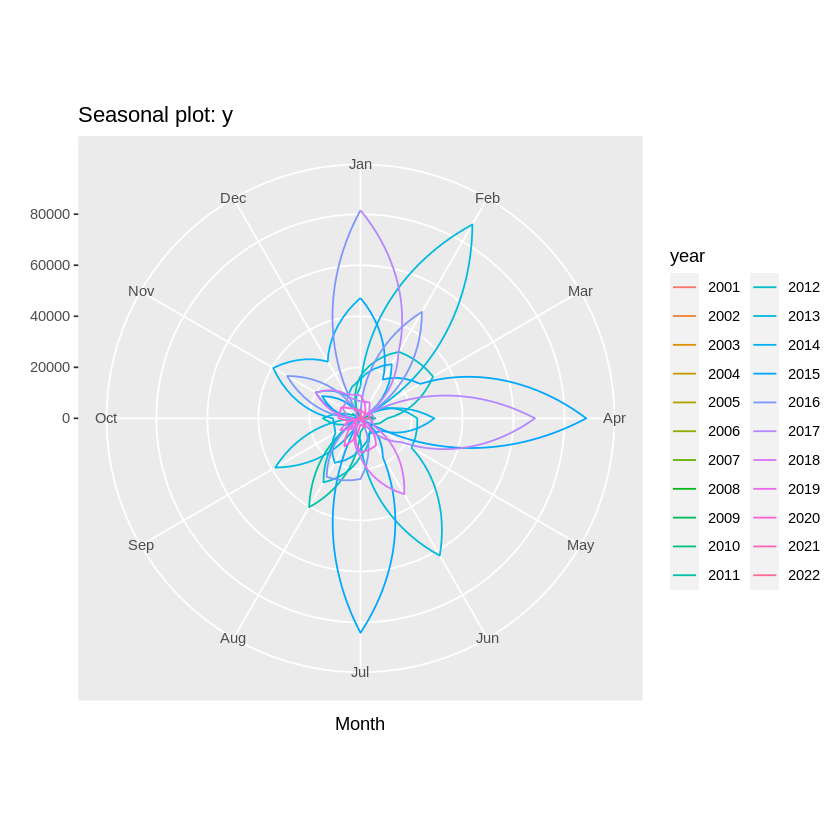

In [25]:
num_pixel = 5
x = df_sinCeros$'coord_x'[num_pixel]
y = df_sinCeros$'coord_y'[num_pixel]

df <- data.frame()
for (year in 2001:2022){
    new_grid <- subsetGrid(grid = ba.mergeGrid5, year = year, lonLim  = x, latLim  = y)
    df <- rbind(df, new_grid$Data)
}
colnames(df) <- c(1:12)
rownames(df) <- c(2001:2022)

z = as.vector(unlist(df))
y <- ts(z, start=2001, frequency=12)
ggseasonplot(y)
ggseasonplot(y, polar=TRUE)

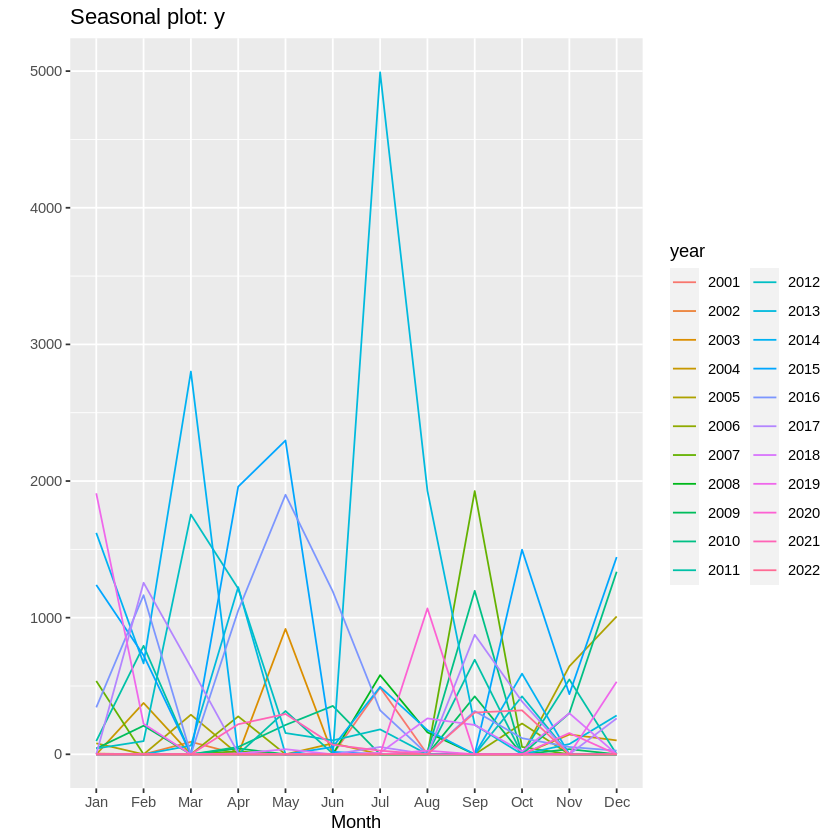

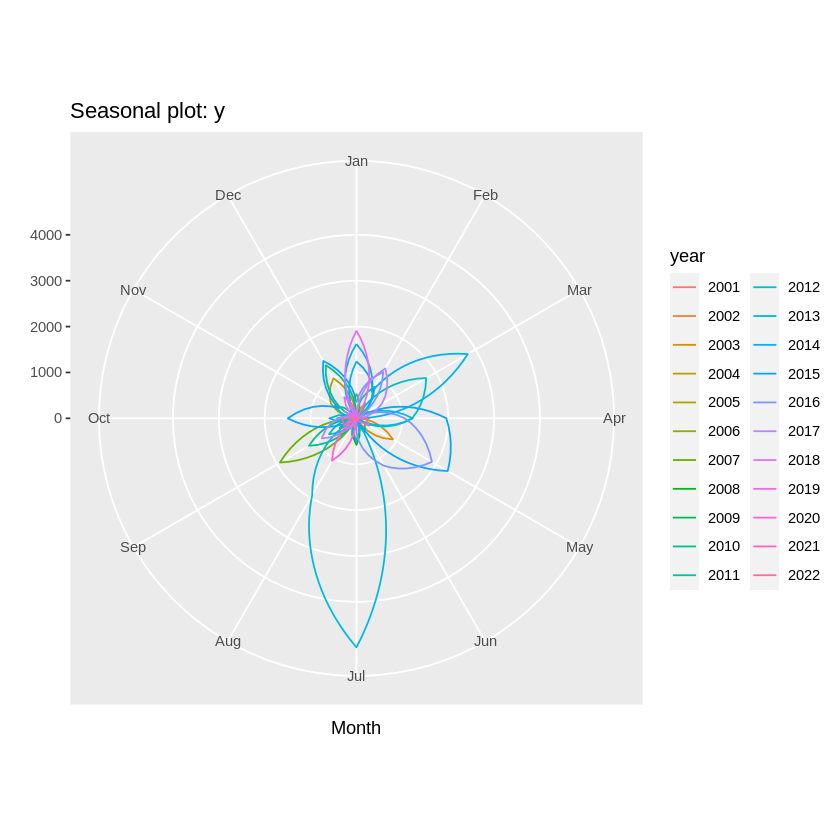

In [14]:
num_pixel = 2
x = df_sinCeros$'coord_x'[num_pixel]
y = df_sinCeros$'coord_y'[num_pixel]

df <- data.frame()
for (year in 2001:2022){
    new_grid <- subsetGrid(grid = ba.mergeGrid5, year = year, lonLim  = x, latLim  = y)
    df <- rbind(df, new_grid$Data)
}
colnames(df) <- c(1:12)
rownames(df) <- c(2001:2022)

z = as.vector(unlist(df))
y <- ts(z, start=2001, frequency=12)
ggseasonplot(y)
ggseasonplot(y, polar=TRUE)

Ahora prueblo acrear un data frame en donde sí que pueda haber ceros y que no estén tan poblados de datos

In [19]:
df_sinCeros <- data.frame()
for (i in 1:nrow(df.seriesTemporales_conCoords)){
    if (any(unlist(df.seriesTemporales_conCoords[i,3:14]) != 0)){
        df_sinCeros <- rbind(df_sinCeros, df.seriesTemporales_conCoords[i,])
    }
}
df_sinCeros[1:5,]

,coord_x,coord_y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-177.5_67.5,-177.5,67.5,0,0,0,0,0.000000,0.2555429,70.275133,17.37712,5.110919,0,0,0
-172.5_62.5,-172.5,62.5,0,0,0,0,0.000000,3.5776429,0.000000,0.00000,0.000000,0,0,0
-172.5_67.5,-172.5,67.5,0,0,0,0,0.000000,137.7191810,2.236743,12.97067,0.000000,0,0,0
-167.5_52.5,-167.5,52.5,0,0,0,0,2.044367,0.0000000,0.000000,0.00000,0.000000,0,0,0
-167.5_62.5,-167.5,62.5,0,0,0,0,35.083319,15.5015381,0.000000,0.00000,0.000000,0,0,0


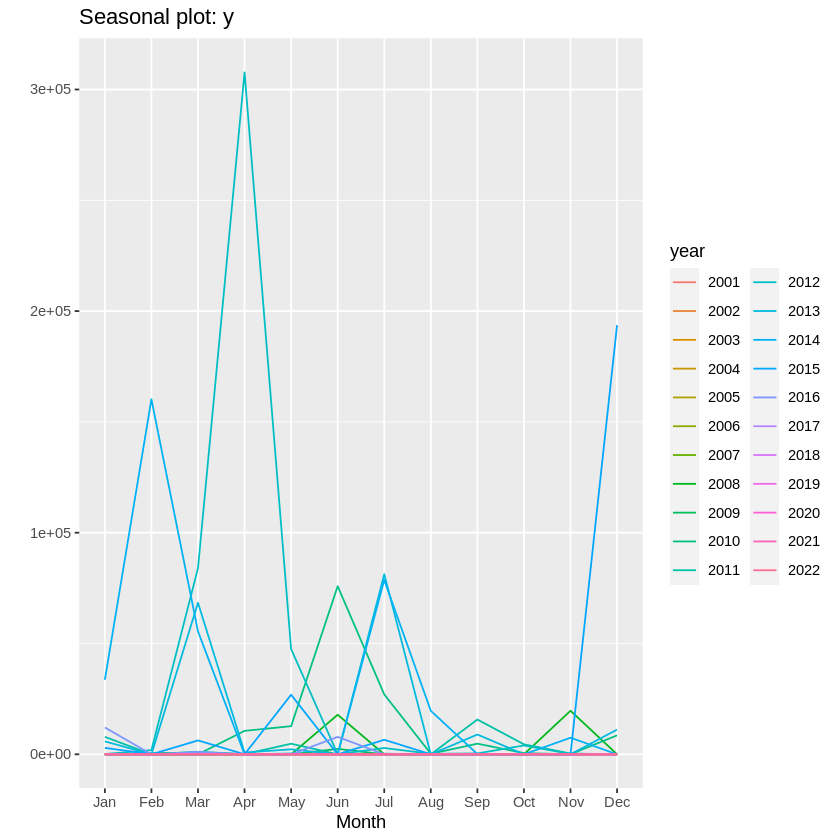

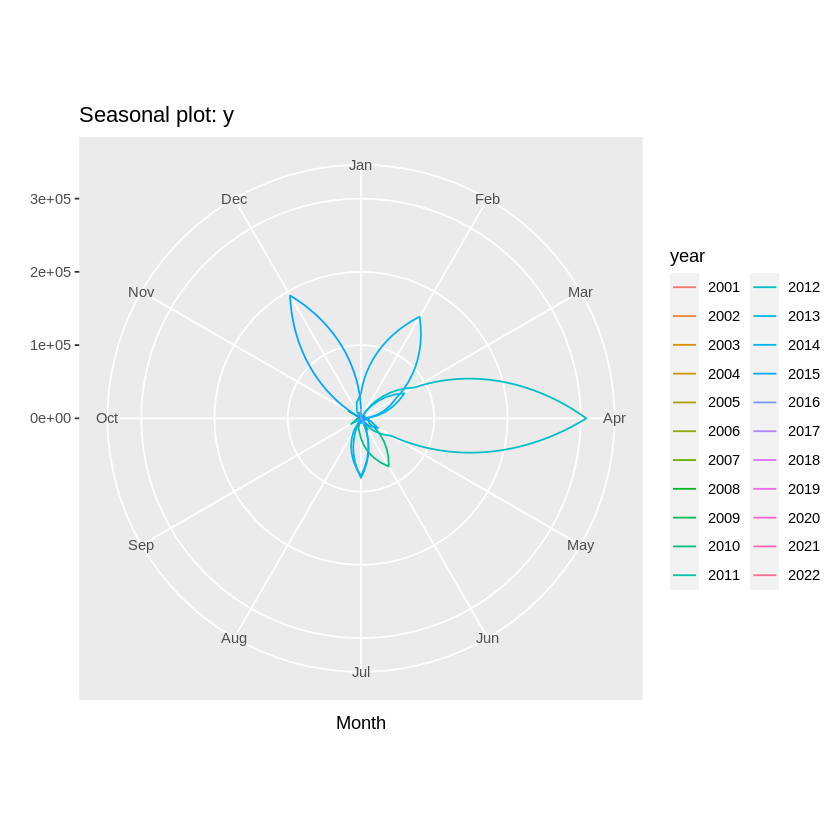

In [21]:
num_pixel = 20
x = df_sinCeros$'coord_x'[num_pixel]
y = df_sinCeros$'coord_y'[num_pixel]

df <- data.frame()
for (year in 2001:2022){
    new_grid <- subsetGrid(grid = ba.mergeGrid5, year = year, lonLim  = x, latLim  = y)
    df <- rbind(df, new_grid$Data)
}
colnames(df) <- c(1:12)
rownames(df) <- c(2001:2022)

z = as.vector(unlist(df))
y <- ts(z, start=2001, frequency=12)
ggseasonplot(y)
ggseasonplot(y, polar=TRUE)